In [2]:
# код для вычисления pi с помощью симуляции монте-карло без векторных вычислений numpy
import random
import numpy as np

random.seed(2001)

pi_values = list()

num_persons = 1000
num_rounds = 20
num_grains = 1000

edge = 30

for r in range(num_rounds):
    for p in range(num_persons):
        in_circle = 0
        for g in range(num_grains):
            x, y = (random.random() - 0.5)*edge, (random.random() -0.5)*edge
            if x**2 + y**2 <= (edge/2)**2:
                in_circle += 1
        pi = in_circle/num_grains * 4
        pi_values.append(pi)
         
print(np.mean(pi_values))


3.1418268000000005


Text(0.5, 1.0, 'Histogram of 1000 random.random() results')

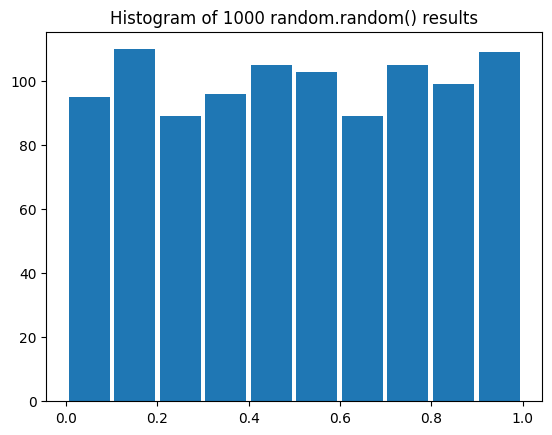

In [3]:

import random
import numpy as np
import matplotlib.pyplot as plt
random.seed(2021)

fig, ax = plt.subplots()
ax.hist([random.random() for _ in range(1000)], bins=10, rwidth=0.9)
ax.set_title("Histogram of 1000 random.random() results")

findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Humor Sans' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Humor Sans' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Humor Sans' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Humor Sans' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Humor Sans' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font fam

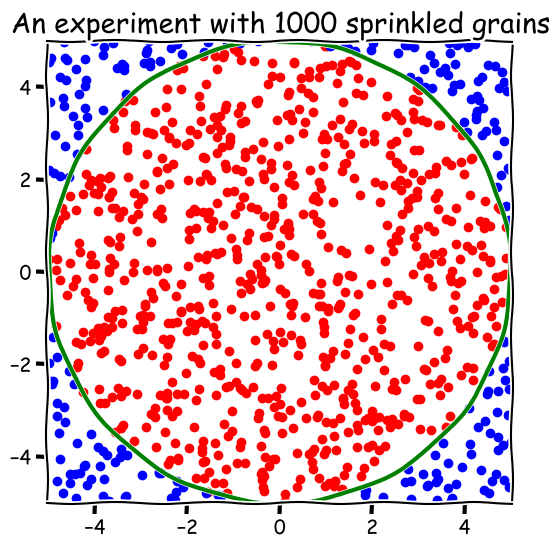

In [6]:
import random
import numpy as np
import matplotlib.pyplot as plt

edge = 10
num_grains = 1000
with plt.xkcd():
    fig, ax = plt.subplots(figsize=(6, 6))
    #plt.axis("off")
    plt.axis("equal")
    ax.set_xlim(-edge/2, edge/2)
    ax.set_ylim(-edge/2, edge/2)
    xs_in, ys_in = list(), list()
    xs_out, ys_out = list(), list()
    for g in range(num_grains):
        x, y = (random.random() - 0.5)*edge, (random.random() - 0.5)*edge
        if x**2 + y**2 <= (edge/2)**2:
            xs_in.append(x)
            ys_in.append(y)
        else:
            xs_out.append(x)
            ys_out.append(y)
    ax.scatter(xs_in, ys_in, color="r")
    ax.scatter(xs_out, ys_out, color="b")
    circle = plt.Circle((0, 0), edge/2, fill=False, color="g", lw=3)
    ax.add_patch(circle)
    ax.set_title("An experiment with 1000 sprinkled grains", fontsize=20)
    

In [32]:
import numpy as np

np.random.seed(2001)

num_persons = 30000
num_rounds = 20
num_grains = 1000
edge = 10

batch_size = 30000
num_batches = num_persons // batch_size

pi_values = np.zeros(num_rounds)

for i in range(num_batches):
    x = np.random.uniform(low=-0.5, high=0.5, size=(num_rounds, batch_size, num_grains)) * edge
    y = np.random.uniform(low=-0.5, high=0.5, size=(num_rounds, batch_size, num_grains)) * edge
    in_circle = np.sum(x**2 + y**2 <= (edge/2)**2, axis=2)
    pi_values += np.mean(in_circle / num_grains * 4, axis=1)

if num_persons % batch_size != 0:
    x = np.random.uniform(low=-0.5, high=0.5, size=((num_persons % batch_size), num_rounds, num_grains)) * edge
    y = np.random.uniform(low=-0.5, high=0.5, size=((num_persons % batch_size), num_rounds, num_grains)) * edge
    in_circle = np.sum(x**2 + y**2 <= (edge/2)**2, axis=2)
    pi_values += np.mean(in_circle / num_grains * 4, axis=1)

print(np.mean(pi_values) / num_batches)

3.1415048800000003


findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Humor Sans' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Humor Sans' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Humor Sans' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Humor Sans' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Humor Sans' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font fam

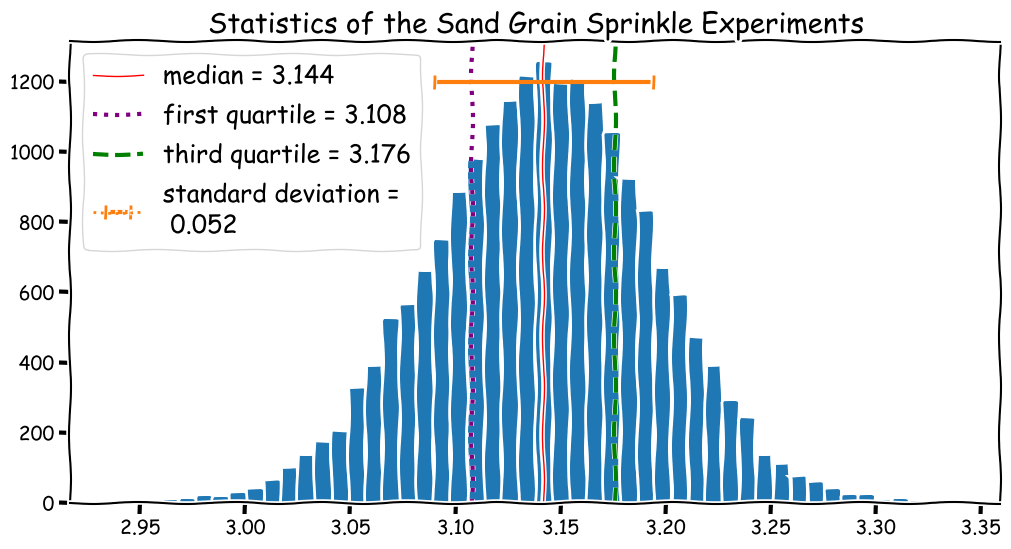

In [7]:
import random
import numpy as np
import matplotlib.pyplot as plt

with plt.xkcd():
    fig, ax = plt.subplots(figsize=(12, 6))
    ax.hist(pi_values, bins=50, rwidth=0.8)
    pi_mean = np.mean(pi_values)
    pi_median = np.median(pi_values)
    # pi_mean and pi_median are very close. Only median is plotted.

    pi_std = np.std(pi_values)
    pi_quartiles = np.quantile(pi_values, [0, 0.25, 0.5, 0.75, 1])
    ax.set_title(
        "Statistics of the Sand Grain Sprinkle Experiments", fontsize=20)
    line_1 = ax.axvline(pi_mean, color='red', lw=1)
    line_2 = ax.axvline(pi_quartiles[1],
                        color='purple',
                        lw=3,
                        linestyle="dotted")
    line_3 = ax.axvline(pi_quartiles[3],
                        color='green',lw=3,
                        linestyle="dashed")
    std_bar = ax.errorbar(pi_mean, 1200,
                          xerr=pi_std,
                          capsize=5,
                          elinewidth=3,
                          markeredgewidth=2,
                          linestyle=":")
    ax.legend([line_1, line_2, line_3, std_bar],
              ["median = {}".format(pi_median),
               "first quartile = {}".format(pi_quartiles[1]),
               "third quartile = {}".format(pi_quartiles[3]),
               "standard deviation =\n {}".format(round(pi_std, 3))],
               fontsize=18)

In [1]:
# код для вычисления pi с помощью симуляции монте-карло без векторных вычислений numpy

import numpy as np

np.random.seed(2001)

num_persons = 30000
num_rounds = 20
num_grains = 1000
edge = 10

x = (np.random.rand(num_rounds, num_persons, num_grains).astype(np.float32) - 0.5) * edge
y = (np.random.rand(num_rounds, num_persons, num_grains).astype(np.float32) - 0.5) * edge

in_circle = np.sum(x**2 + y**2 <= (edge/2)**2, axis=2)
pi_values = np.mean(in_circle / num_grains * 4, axis=1)

print(np.mean(pi_values))


3.141504973333334


: 

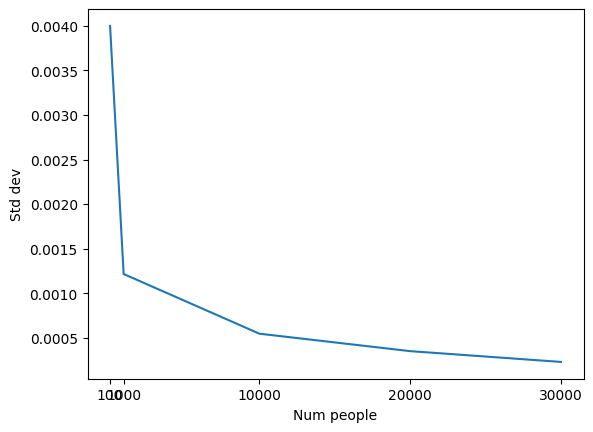

In [8]:
import matplotlib.pyplot as plt
import numpy as np

# Данные из таблицы
x = [100, 1000, 10000, 20000, 30000]
y = [0.004, 0.001215, 0.000545, 0.000349, 0.000228]

# Построение графика
plt.plot(x, y)

# Настройка осей
plt.xticks(x)
plt.xlabel('Num people')
plt.ylabel('Std dev')

# Отображение графика
plt.show()